In [99]:
from invertedai_drive import drive
from invertedai_drive.utils import MapLocation
from IPython.display import Image
from PIL import Image as PImage
import imageio
import torch
import numpy as np
import matplotlib
import cv2

In [106]:
response = drive.initialize(MapLocation.Town03_Roundabout, agents_counts=10, num_samples=1, min_speed=10, max_speed=20)

In [107]:
initial_condition = response['initial_condition']

In [108]:
initial_states = initial_condition['agent_states']

In [109]:
agent_sizes = initial_condition['agent_sizes']

In [111]:
x=initial_states['x']
y=initial_states['y']
psi=initial_states['psi']
speed=initial_states['speed']
length=agent_sizes['length']
width=agent_sizes['width']
lr=agent_sizes['lr']
recurrent_states=None
frames = []
for t in range(100):
    drive_response = drive.run(api_key='',
                               location=MapLocation.Town03_Roundabout, 
                               x=x,
                               y=y, 
                               psi=psi, 
                               speed=speed,
                               length=length,
                               width=width,
                               lr=lr,
                               batch_size=1, agent_counts=10, obs_length=1,
                               step_times=1,
                               recurrent_states=recurrent_states,
                               return_birdviews=True)
    states = drive_response.states
    print(states)
    x=states.x[0]
    y=states.y[0]
    psi=states.psi[0]
    speed=states.speed[0]
    recurrent_states = np.array(drive_response.recurrent_states)[0, :, :, 0, ...].tolist()
    birdview=np.array(drive_response.bird_view, dtype=np.uint8)                                                                                   
    image = cv2.imdecode(birdview, cv2.IMREAD_COLOR)
    frames.append(image)
    im = PImage.fromarray(image)
imageio.mimsave(
            'test.gif', np.array(frames),
            format="GIF-PIL"
        )

{'x': [[[[12.13], [-64.14], [50.76], [54.84], [83.47], [5.88], [-19.14], [15.06], [-75.63], [-87.67]]]], 'y': [[[[-1.06], [16.23], [19.49], [7.93], [-2.1], [-7.08], [26.46], [-4.36], [35.39], [13.19]]]], 'psi': [[[[-2.46], [0.02], [0.06], [-3.11], [-1.51], [-2.9], [1.1], [-2.18], [-1.65], [-2.74]]]], 'speed': [[[[16.89], [12.6], [16.3], [19.84], [15.66], [12.89], [17.91], [13.27], [18.23], [17.78]]]]}


AttributeError: 'dict' object has no attribute 'x'

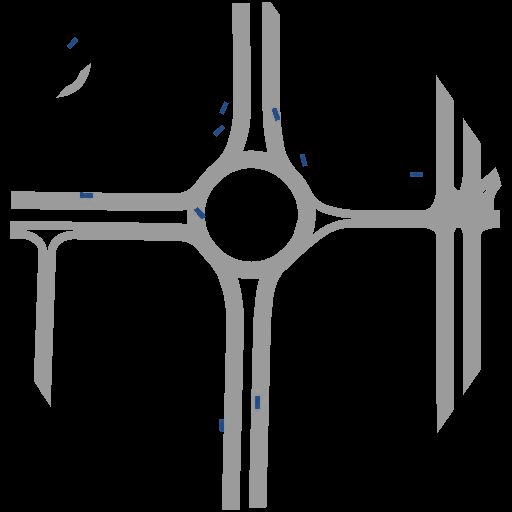

In [105]:
Image('test.gif')